# ANOVA (one way)

In [2]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame({
    'WeightPercent': [15]*5 + [20]*5 + [25]*5 + [30]*5 + [35]*5,
    'Observations': [7, 7, 15, 11, 9,
                    12, 17, 12, 18, 18,
                    14, 19, 19, 18, 18,
                    19, 25, 22, 19, 23,
                    7, 10, 11, 15, 11]
})
data

,WeightPercent,Observations
0,15,7
1,15,7
2,15,15
3,15,11
4,15,9
5,20,12
6,20,17
7,20,12
8,20,18
9,20,18


In [4]:
# Compare the means... Are the differences statistically significant?
data['Observations'].groupby(data['WeightPercent']).agg('mean')

WeightPercent
15     9.8
20    15.4
25    17.6
30    21.6
35    10.8
Name: Observations, dtype: float64

In [5]:
rp.summary_cont(data['Observations'].groupby(data['WeightPercent']))

,N,Mean,SD,SE,95% Conf.,Interval
WeightPercent,,,,,,
15,5,9.8,3.346640,1.496663,6.520293,13.079707
20,5,15.4,3.130495,1.400000,12.332115,18.467885
25,5,17.6,2.073644,0.927362,15.567829,19.632171
30,5,21.6,2.607681,1.166190,19.044473,24.155527
35,5,10.8,2.863564,1.280625,7.993707,13.606293


In [6]:
n = 5
a = 5
N = n*a
SS_treatments = n * sum([(data[data.WeightPercent == 5*(i+3)].Observations.mean() - data.Observations.mean())**2 for i in range(a)])
MS_treatments = SS_treatments / (a-1)
SS_T = sum([(data.Observations.iloc[i] - data.Observations.mean())**2 for i in range(data.shape[0])])
SS_e = SS_T - SS_treatments
MS_e = SS_e / (N-a)
F_0 = MS_treatments / MS_e
p_value = 1 - stats.f.cdf(F_0, a-1, N-a)
print("Summary")
print(f"n = {n}, a = {a}, N = {N}")
print(f"SS_treatments = {SS_treatments}, MS_treatments = {MS_treatments}")
print(f"SS_T = {SS_T}")
print(f"SS_e = {SS_e}, MS_e = {MS_e}")
print(f"F_0 = {F_0}")
print(f"P value = {p_value}")


Summary
n = 5, a = 5, N = 25
SS_treatments = 475.7600000000001, MS_treatments = 118.94000000000003
SS_T = 636.9600000000002
SS_e = 161.20000000000005, MS_e = 8.060000000000002
F_0 = 14.75682382133995
P value = 9.127937124042695e-06


In [7]:
# Confirm the package result with my hand baked result
stats.f_oneway(data['Observations'][data['WeightPercent'] == 15], 
               data['Observations'][data['WeightPercent'] == 20],
               data['Observations'][data['WeightPercent'] == 25],
               data['Observations'][data['WeightPercent'] == 30],
               data['Observations'][data['WeightPercent'] == 35])

F_onewayResult(statistic=14.756823821339955, pvalue=9.127937124058432e-06)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 7,  7,  7,  9, 10, 11, 11, 11, 12, 12, 14, 15, 15, 17, 18, 18, 18,
         18, 19, 19, 19, 19, 22, 23, 25])),
 (5.280758546845576, 15.04, 0.9807493215868268))

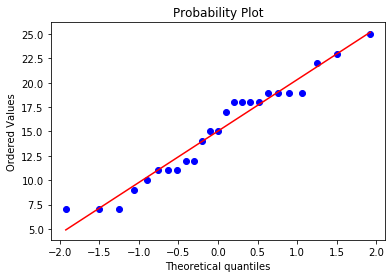

In [8]:
stats.probplot(data['Observations'], plot=plt)

In [9]:
# There is no evidence to counter the claim that all five variances are the same.
stats.bartlett(data['Observations'][data['WeightPercent'] == 15], 
               data['Observations'][data['WeightPercent'] == 20],
               data['Observations'][data['WeightPercent'] == 25],
               data['Observations'][data['WeightPercent'] == 30],
               data['Observations'][data['WeightPercent'] == 35])

BartlettResult(statistic=0.9330902889575428, pvalue=0.9197662183749297)

In [10]:
alpha = 0.05
LSD = abs(stats.t.ppf(alpha/2, N-a)) * (2*MS_e/n)**0.5
LSD

3.7454517824600626

In [11]:
preds = data['Observations'].groupby(data['WeightPercent']).agg('mean')
data['Preds'] = data.apply(lambda row: preds[ row.WeightPercent ], axis=1)
data

,WeightPercent,Observations,Preds
0,15,7,9.8
1,15,7,9.8
2,15,15,9.8
3,15,11,9.8
4,15,9,9.8
5,20,12,15.4
6,20,17,15.4
7,20,12,15.4
8,20,18,15.4
9,20,18,15.4


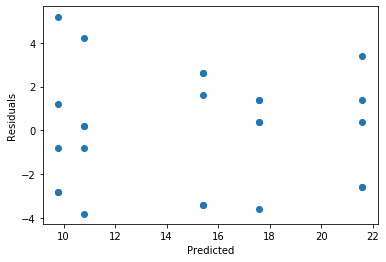

In [12]:
residuals = data['Observations'] - data['Preds']
plt.scatter(data['Preds'], residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()